In [1]:
import pandas as pd
df=pd.read_csv('http://bit.ly/autompg-csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


<AxesSubplot:xlabel='hp', ylabel='mpg'>

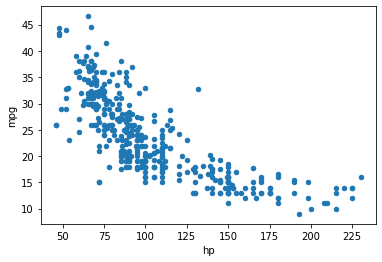

In [2]:
%matplotlib inline
df.plot.scatter(x='hp',y='mpg')

In [1]:
import requests

response = requests.get('https://httpbin.org/ip')

print('Your IP is {0}'.format(response.json()['origin']))


Your IP is 174.250.44.4


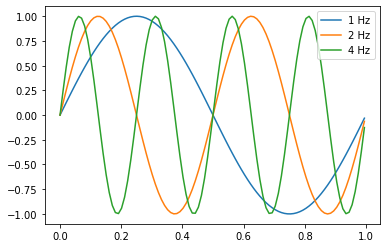

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fs = [1, 2, 4]
all_time=np.linspace(0,2,200)
t=all_time[:100]

for f in fs:
    y=np.sin(2 * np.pi * f * t)
    plt.plot(t, y, label='{} Hz'.format(f))
plt.legend()
plt.savefig('basics_python.pdf')



In [13]:
letters="abcdef"
step = 3
for offset in range(0, len(letters), step):
    print(letters[offset:offset+step])

    

abc
def


In [21]:
import numpy as np
a=np.arange(9).reshape(3,3)
e=np.eye(3)
print(a*e)
print(a@e)

[[0. 0. 0.]
 [0. 4. 0.]
 [0. 0. 8.]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [27]:
import numpy as np
a=np.arange(24).reshape(2,3,4)
a.max()
print(a)
a.max(axis=1)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[ 8,  9, 10, 11],
       [20, 21, 22, 23]])

In [28]:
sentence="the quick brown fox"
sentence.strip().upper().replace(' ', '_')

'THE_QUICK_BROWN_FOX'

In [42]:
from sklearn import datasets
digits = datasets.load_digits()
digits.data.shape


(1797, 64)

In [43]:
digits.target.shape



(1797,)

In [45]:
from sklearn import svm
est = svm.SVC(gamma=0.0001, C=100.)
est.fit(digits.data[:-5], digits.target[:-5])
est.predict(digits.data[-5:])


array([9, 0, 8, 9, 8])

In [46]:
digits.target[-5:]


array([9, 0, 8, 9, 8])

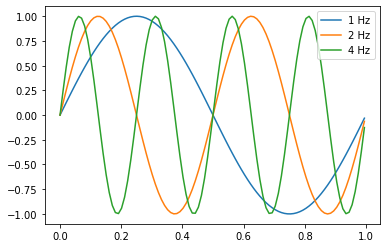

In [66]:
import numpy as np
import matplotlib.pyplot as plt

fs = [1, 2, 4]
all_time = np.linspace(0, 2, 200)
t = all_time[:100]

fig, ax = plt.subplots()
for f in fs:
    y = np.sin(2 * np.pi * f * t)
    ax.plot(t, y, label='{} Hz'.format(f))

ax.legend()
fig.savefig('basics_python.pdf')


C:\Users\jackl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


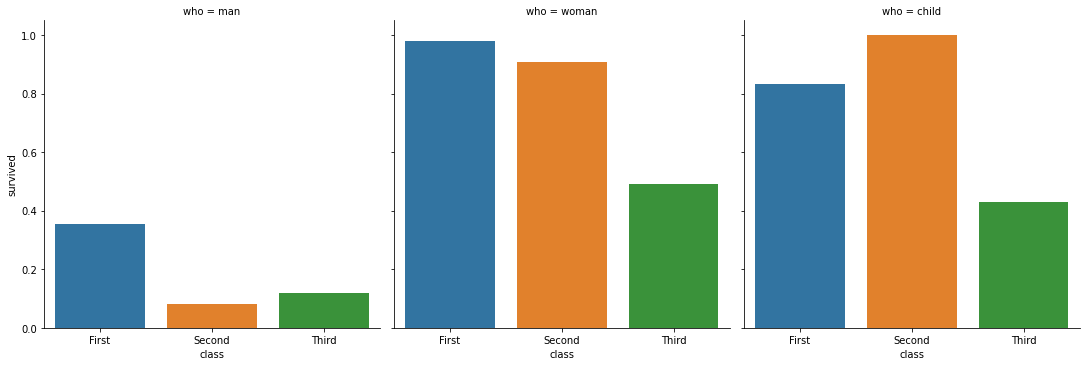

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
grid = sns.factorplot(x='class', y='survived', col='who',
data=titanic, kind='bar', ci=None,
order=['First', 'Second', 'Third'])
plt.savefig('seaborn_titanic.pdf')

In [49]:
import h5py
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
y_sin= np.sin(x)
y_cos= np.cos(x)
f = h5py.File('my_data.h5', 'w')
f['inputs/x'] = x
f['outputs/y_sin'] = y_sin
f['outputs/y_cos'] = y_cos
f.close()


In [57]:
from timeit import timeit
setup = """
import numpy as np
a = np.arange(100000000).reshape(10000, 10000)

def contiguous_sum(x):
    for i in range(x.shape[0]):
        x[i].sum()
        
def non_contiguous_sum(x):
    for i in range(x.shape[-1]):
        x[:, i].sum()

"""
n=100
time_contiguous = timeit('contiguous_sum(a)', setup=setup, number=n) / n
time_non_contiguous = timeit('non_contiguous_sum(a)', setup=setup, number=n) / n
print("Contiguous: {:.4f}s per loop".format(time_contiguous))
print("None Contiguous: {:.4f}s per loop".format(time_non_contiguous))
print("Ratio: {:.3f}".format(time_non_contiguous / time_contiguous))



Contiguous: 0.0669s per loop
None Contiguous: 0.7266s per loop
Ratio: 10.854


[[1 1 2]
 [1 2 1]] 1.5707963267948966
Before rotation: [1.  2.  0.5]
After rotation: [-1.  -0.5 -2. ]


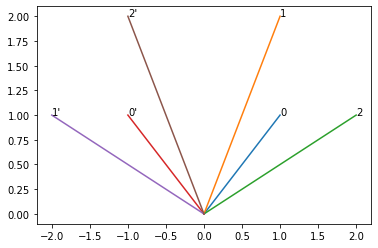

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def rotate(v, w):
    """Rotate 2D matrix v by angle w in radians."""
    print(v, w)
    R = np.array([[np.cos(w), -np.sin(w)],
    [np.sin(w), np.cos(w)]])
    return R @ v

def plot_vectors(v, before=True):
    """Plot vectors v from origin."""
    v_p = np.vstack((np.zeros_like(v), v))
    plt.plot(v_p[::2], v_p[1::2])
    for i, xy in enumerate(v.T):
        if before:
            label = '{}'.format(i)
        else:
            label= "{}'".format(i)
        plt.annotate(label, xy)

def slope(p0, p1):
    """Calculate slope between p0 and p1."""
    return (p1[1] - p0[1]) / (p1[0] - p0[0])

if __name__ == '__main__':
    before = np.array([[1, 1, 2],
                       [1, 2, 1]])
    after = rotate(before, np.pi/2)
    origin = np.array((0, 0))

    before_slope = slope(origin, before)
    after_slope = slope(origin, after)
    print("Before rotation: {}".format(before_slope))
    print("After rotation: {}".format(after_slope))
    plot_vectors(before)
    plot_vectors(after, before=False)
    plt.show()

In [63]:
import numpy.testing as npt
from scipy.io import loadmat
#import rotate, slope

def test_rotate():
    data = loadmat('./rotate_data.mat', squeeze_me=True)
    test_inputs = data['inputs']
    test_outputs = data['outputs']
    for inputs, outputs in zip(test_inputs, test_outputs):
        npt.assert_allclose(rotate(*inputs), outputs)

def test_slope():
    data = loadmat('./slope_data.mat', squeeze_me=True)
    test_inputs = data['inputs']
    test_outputs = data['outputs']
    for inputs, outputs in zip(test_inputs, test_outputs):
        npt.assert_allclose(slope(*inputs), outputs)

In [64]:
words = ['quick', 'brown', 'fox']
for i_word in range(len(words)):
    print(words[i_word])

quick
brown
fox


In [65]:
words = ['quick', 'brown', 'fox']
for word in words:
    print(word)


quick
brown
fox


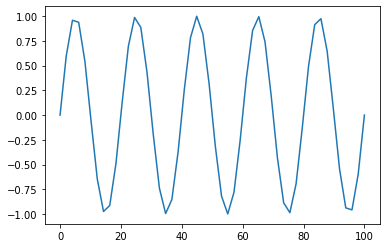

In [73]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,100)
y=np.sin(0.1*np.pi*x)
plt.plot(x,y)
plt.show()